<a href="https://colab.research.google.com/github/ms624atyale/Data_Analysis/blob/main/11_NormalityTest_SWtest_KStest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💦🔥 **Normality test**

1. Small sample size (N<50), which is comparable to **Shapiro-Wilk** test on SPSS

2. Big sample size (N>50), which is comparable to **Kolmogorov-Smirnov** test on SPSS



# <font color = 'green'> **1. Small Sample Size (N < 50)**
    Be aware that the following script generates different results for everyone running it!

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# Generate a random dataset (replace this with your own data)
# The following code line generates random numbers from a normal (Gaussian) distribution using NumPy's random.normal function.
# loc=0, scale=1, size=50 (creating an array of 50 numbers drawn from a normal distribution with a mean (loc) of 0 and a standard deviation (scale) of 1.
data1 = np.random.normal(loc=0, scale=1, size=50)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data1, columns=['Values'])

# Save the DataFrame to a CSV file
df.to_csv('generated_data1.csv', index=True)

# Perform Shapiro-Wilk test for normality
# Tuple unpacking: shapiro() function returns a tuple containing two values: the test statistic and the p-value.
# By separating statistic and p_value with a comma, Python interprets the returned tuple and assigns each value to its corresponding variable.
statistic, p_value = shapiro(data1)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")



Shapiro-Wilk Test Statistic: 0.9518951773643494
p-value: 0.04083475470542908
Sample does not look Gaussian (reject H0)


# <font color = 'green'> **1. Big Sample Size (N > 50)**
    Be aware that the following script generates different results for everyone running it!

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import kstest, norm


# Generate a random dataset (replace this with your own data)
# loc=0, scale=1, size=100 (creating an array of 100 numbers drawn from a normal distribution with a mean (loc) of 0 and a standard deviation (scale) of 1.
data2 = np.random.normal(loc=0, scale=1, size=100)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data2, columns=['Values'])

# Save the DataFrame to a CSV file
df.to_csv('generated_data2.csv', index=True)

# Perform Shapiro-Wilk test for normality
statistic, p_value = kstest(data2, 'norm')

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Kolmogorov-Smirnov Test Statistic: 0.08424140719115036
p-value: 0.4523782801587022
Sample looks Gaussian (fail to reject H0)


## 💿 💿 When you use your csv. file...
    Be aware that the following script generates the same result for everyone running it!

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kstest, norm

file = pd.read_csv('/content/GeneratedSampleData.csv')
final_data = file['Values'] # [IMPORTANT] Column name should be specified, otherwise, ValueError occurs.


# Perform Shapiro-Wilk test for normality
statistic, p_value = kstest(final_data, 'norm')

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Kolmogorov-Smirnov Test Statistic: 0.0747373141051324
p-value: 0.6047553071972323
Sample looks Gaussian (fail to reject H0)


## CTT (Critical Test Threshold)

- The p-value represents the probability of observing the test statistic (or more extreme) under the assumption that the null hypothesis is true. However, it doesn't provide information about the size of the effect or the practical significance of the result.

- On the other hand, the critical test threshold (CTT) is the predetermined significance level (often denoted as alpha) at which you're willing to reject the null hypothesis. It is typically set to 0.05.

Kolmogorov-Smirnov Test Statistic: 0.0747373141051324
p-value: 0.6047553071972323
Sample looks Gaussian (fail to reject H0)


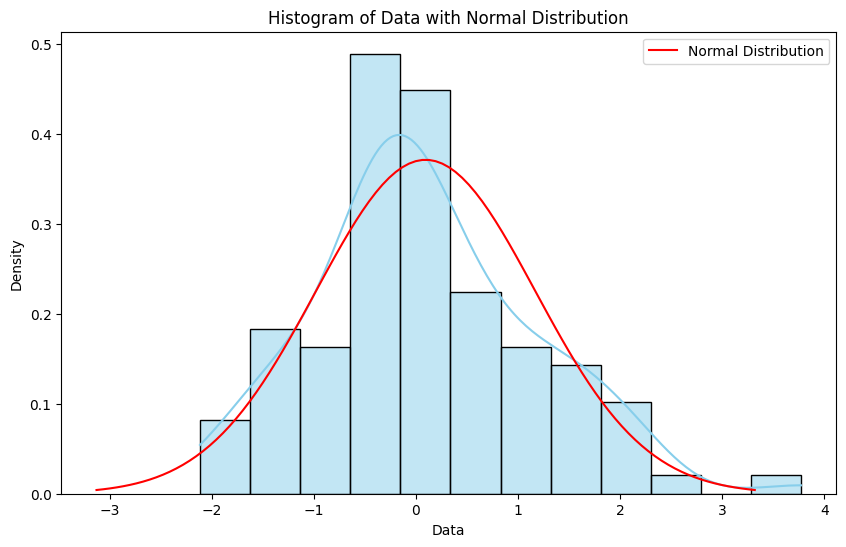

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm

# Load the data from the CSV file
file = pd.read_csv('/content/GeneratedSampleData.csv')
final_data = file['Values']  # Extract the column containing the data

# Perform Kolmogorov-Smirnov test for normality
statistic, p_value = kstest(final_data, 'norm')

# Print the test statistic and p-value
print("Kolmogorov-Smirnov Test Statistic:", statistic)
print("p-value:", p_value)

# Define the CTT (critical test threshold, aka., alpha)
alpha = 0.05

# Interpret the result
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

# Plot histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(final_data, kde=True, color='skyblue', stat='density')

# Plot normal distribution curve
mu, sigma = np.mean(final_data), np.std(final_data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Normal Distribution')

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data with Normal Distribution')
plt.legend()
plt.show()

## ➡️ T-test (with either SW test or KS test, p>0.05)
## ➡️➡️ Wilcoxon Rank Sum text (with either SW test or KS test, p<0.05)